# Section 2.1: Tracing the origin of C

### Result: Identification of which star is responsible for the origin of C

In [1]:
import matplotlib.pyplot as plt
import sygma
import omega
import stellab

In [2]:
#loading the observational data module STELLAB
stellab = stellab.stellab()

## Simulation of the Milky Way

In [7]:
# OMEGA parameters for MW
mass_loading = 1     # How much mass is ejected from the galaxy per stellar mass formed
nb_1a_per_m = 3.0e-3  # Number of SNe Ia per stellar mass formed
sfe = 0.005           # Star formation efficiency, which sets the mass of gas
table = 'yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt' # Yields for AGB and massive stars
#milky_way

o_mw = omega.omega(iniZ=0.0001,galaxy='milky_way',Z_trans=-1, table=table,sfe=sfe, DM_evolution=True,\
                  mass_loading=mass_loading, nb_1a_per_m=nb_1a_per_m, special_timesteps=60)

OMEGA run in progress..
   OMEGA run completed - Run time: 6.0s


# Comparison of chemical evolution prediction with observation

<IPython.core.display.Javascript object>


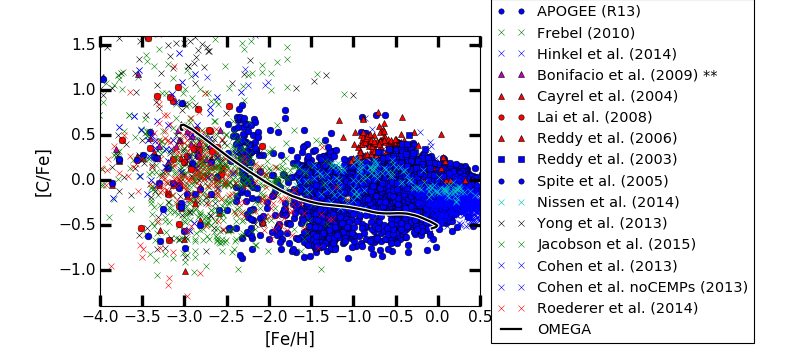

Solar value for Fe not found in Bonifacio et al. (2009).  [Fe/H] was not modified.
Solar values for C and Fe not found in Bonifacio et al. (2009).  [C/Fe] was not modified.


(-1.4, 1.6)

In [9]:
# Choose abundance ratios
%matplotlib nbagg
xaxis = '[Fe/H]'
yaxis = '[C/Fe]'

# Plot observational data points (Stellab)
stellab.plot_spectro(fig=1,xaxis=xaxis, yaxis=yaxis,norm='Grevesse_Noels_1993',galaxy='milky_way',show_err=False)

# Extract the numerical predictions (OMEGA)
xy_f = o_mw.plot_spectro(fig=1,xaxis=xaxis,yaxis=yaxis,return_x_y=True)

# Overplot the numerical predictions (they are normalized according to Grevesse & Noels 1993)
plt.plot(xy_f[0],xy_f[1],linewidth=4,color='w')
plt.plot(xy_f[0],xy_f[1],linewidth=2,color='k',label='OMEGA')

# Update the existing legend
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=13)

# Choose X and Y limits
plt.xlim(-4,0.5)
plt.ylim(-1.4,1.6)

# Tracing back to simple stellar populations.

The first stellar population was born at Z=0.0001 (since iniZ=0.0001). Let us look at the early enrichment by populations with initial metallicity of Z=0.0001 and Z=0.001.

In [12]:
s0p0001=sygma.sygma(iniZ=0.0001)
s0p001=sygma.sygma(iniZ=0.001)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.56s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.53s


### What is [C/Fe] for two SSPs at Z=0.0001 and Z=0.001?

<IPython.core.display.Javascript object>


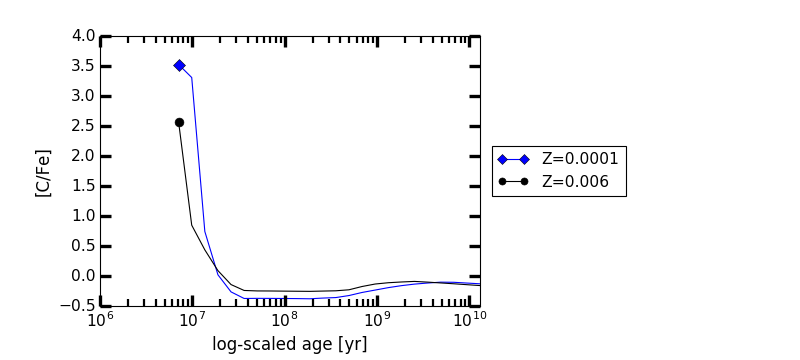

In [13]:
elem='[C/Fe]'
s0p0001.plot_spectro(fig=3,yaxis=elem,marker='D',color='b',label='Z=0.0001')
s0p001.plot_spectro(fig=3,yaxis=elem,label='Z=0.006')

## Now lets focus on C. What is the evolution of the total mass of C?

<IPython.core.display.Javascript object>


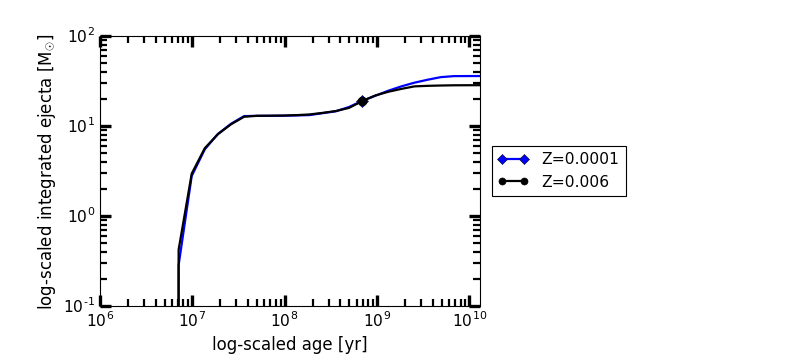

In [14]:
# Plot the ejected mass of a certain element
elem='C'
s0p0001.plot_mass(fig=4,specie=elem,marker='D',color='b',label='Z=0.0001')
s0p001.plot_mass(fig=4,specie=elem,label='Z=0.006')

## Which stars contribute the most to C?

<IPython.core.display.Javascript object>


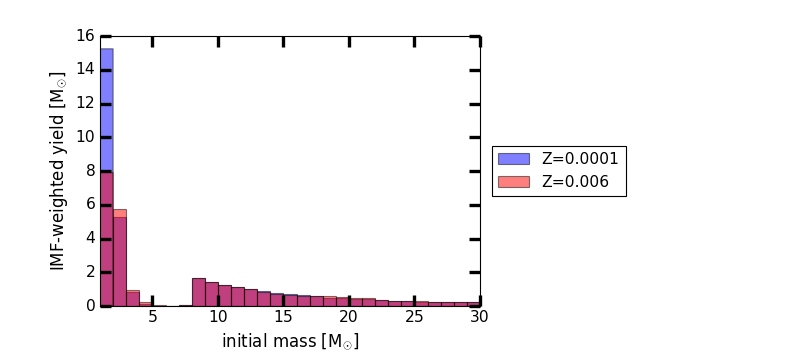

In [15]:
elem='C'
s0p0001.plot_mass_range_contributions(specie=elem,marker='D',color='b',label='Z=0.0001')
s0p001.plot_mass_range_contributions(specie=elem,label='Z=0.006')

AGB stars!

## Which AGB stars have the largest stellar yields of C-12?

<IPython.core.display.Javascript object>


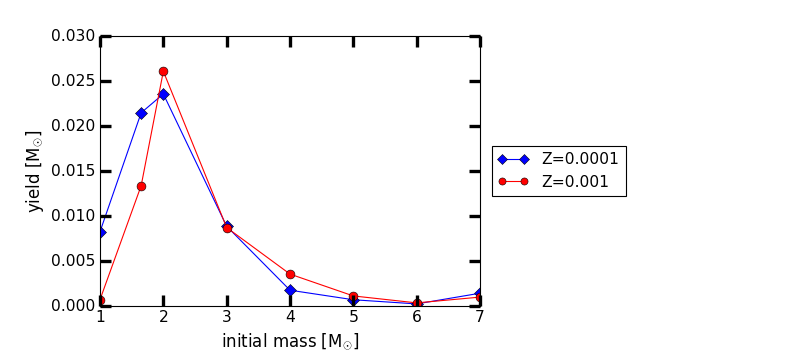

In [19]:
s0p0001.plot_table_yield(fig=6,iniZ=0.0001,table='yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt',
                         yaxis='C-12',masses=[1.0, 1.65, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],marker='D',color='b',)
s0p001.plot_table_yield(fig=6,iniZ=0.001,table='yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt',
                        yaxis='C-12',masses=[1.0, 1.65, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])